In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import project_functions
df = project_functions.load_and_process("../../data/raw/Medical Expenses.csv")
df

,Age,Sex,BMI,Number of Children,Smoker,Place of Residence,Medical Insurance Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Use `.info` to ensure there are no NaN values in dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1338 non-null   int64  
 1   Sex                        1338 non-null   object 
 2   BMI                        1338 non-null   float64
 3   Number of Children         1338 non-null   int64  
 4   Smoker                     1338 non-null   object 
 5   Place of Residence         1338 non-null   object 
 6   Medical Insurance Charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Use `.describe` to get an overview of the numerical data in the dataset**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Number of Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Medical Insurance Charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Use `.pairplot` to show the correlation between pairs of numerical variables**

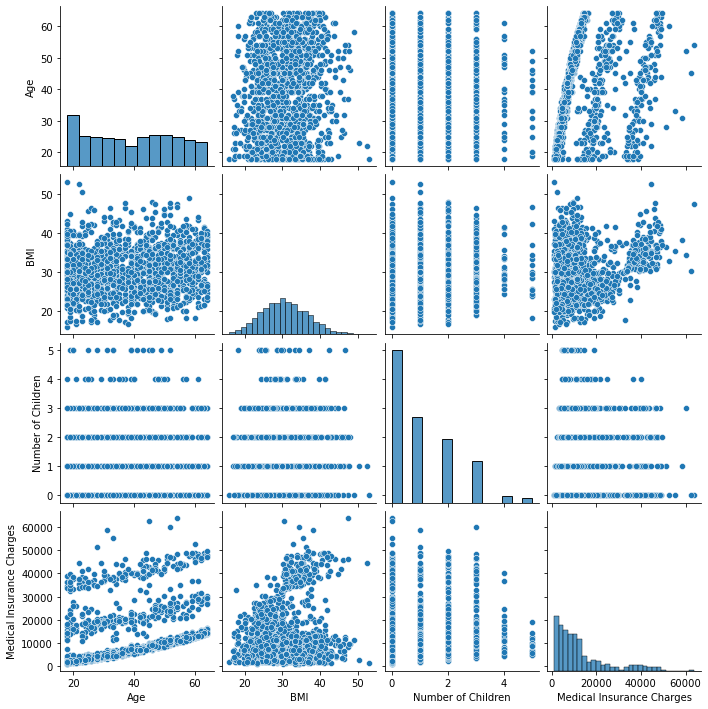

In [36]:
sns.pairplot(df)

**Use `.displot` to take a closer look at the distribution of medical insurance charges**

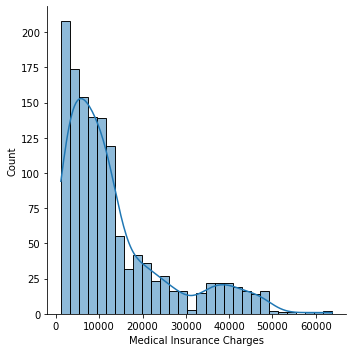

In [37]:
sns.displot(data=df, x="Medical Insurance Charges", kde=True)

The distribution of charges is skewed to the left. Most of the charges are below $20,000

***Use `.scatterplot` to take a closer look at the correlation between age and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='Age', ylabel='Medical Insurance Charges'>

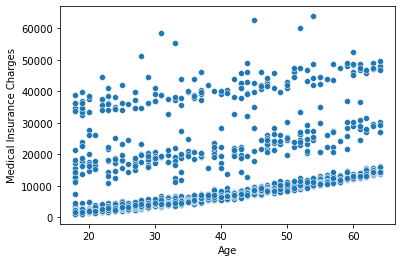

In [39]:
sns.scatterplot(data=df,x="Age",y="Medical Insurance Charges")

<AxesSubplot:xlabel='Medical Insurance Charges', ylabel='Age'>

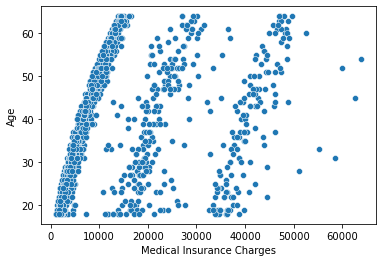

In [40]:
sns.scatterplot(data=df,x="Medical Insurance Charges",y="Age")

***Use `.scatterplot` to take a closer look at the correlation between BMI and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='BMI', ylabel='Medical Insurance Charges'>

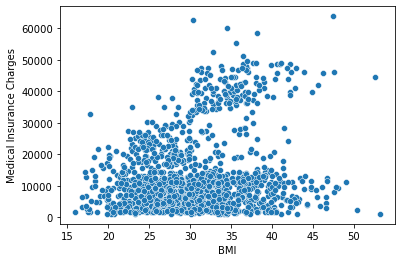

In [41]:
sns.scatterplot(data=df,x="BMI",y="Medical Insurance Charges")

<AxesSubplot:xlabel='Medical Insurance Charges', ylabel='BMI'>

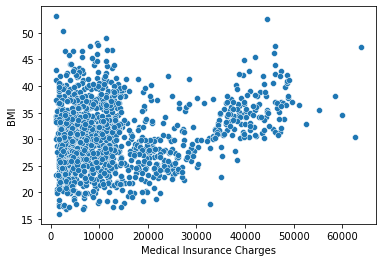

In [113]:
sns.scatterplot(data=df,x="Medical Insurance Charges",y="BMI")

***Use `.scatterplot` to take a closer look at the correlation between number of children and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='Medical Insurance Charges', ylabel='Number of Children'>

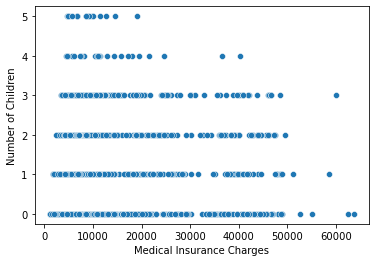

In [44]:
sns.scatterplot(data=df,x="Medical Insurance Charges",y="Number of Children")

<AxesSubplot:xlabel='Number of Children', ylabel='Medical Insurance Charges'>

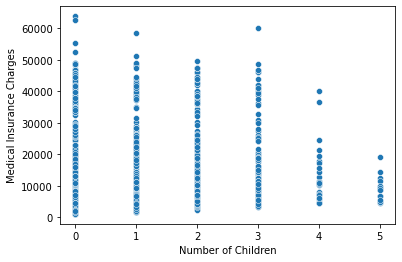

In [111]:
sns.scatterplot(data=df,x="Number of Children",y="Medical Insurance Charges")

The distribution of charges seems somewhat even until the individuals with 5 children. Individuals with 5 children have considerable lower costs on average. 

**Use `.displot` to show the distribution of medical insurance charges for smokers**

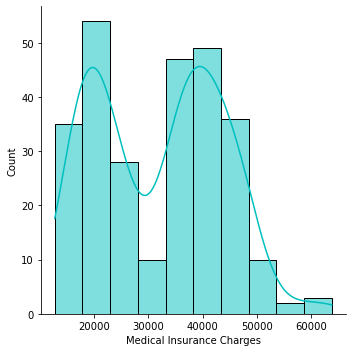

In [76]:
sns.displot(df[df.Smoker=='yes'],x='Medical Insurance Charges',color='c',kde=True)

**Use `.displot` to show the distribution of medical insurance charges for non-smokers**

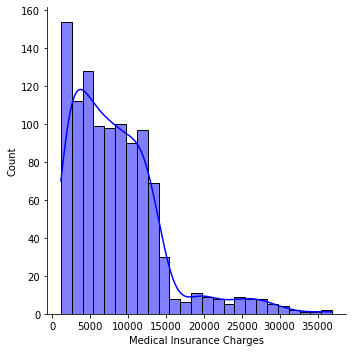

In [71]:
sns.displot(df[df.Smoker=='no'],x='Medical Insurance Charges',color='b',kde=True)

Smokers are charges considerably more on average than non-smokers

***User `.countplot` to see the distribution of sexes***

<AxesSubplot:xlabel='Sex', ylabel='count'>

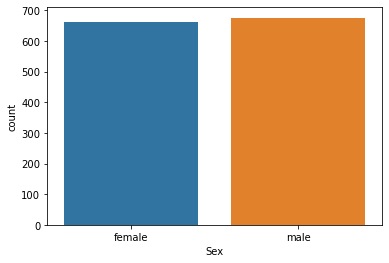

In [91]:
sns.countplot(data=df,x='Sex')

The number of males and females is almost equal which will help yeild more reliable results for the gender bias study

**Use `.displot` to show the distribution of medical insurance charges for males**

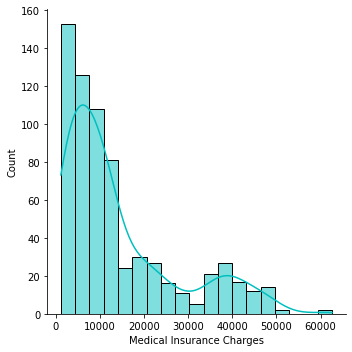

In [72]:
sns.displot(df[df.Sex=='male'],x='Medical Insurance Charges',color='c',kde=True)

**Use `.displot` to show the distribution of medical insurance charges for females**

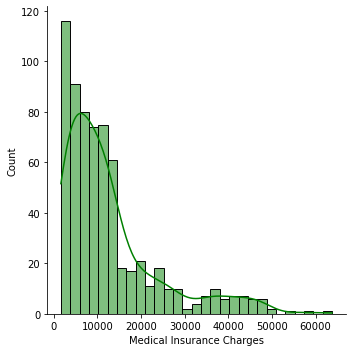

In [84]:
sns.displot(df[df.Sex=='female'],x='Medical Insurance Charges',color='green',kde=True)

***Use `.groupby()` to calculate the mean medical insurance charge based on sex***

In [86]:
round(df.groupby('Sex')['Medical Insurance Charges'].mean(),2)

Sex
female    12569.58
male      13956.75
Name: Medical Insurance Charges, dtype: float64

It seems that men are charged less for medical insurance on average

***Use `.lineplot` to show trend in medical insurance costs as age increases***

<AxesSubplot:xlabel='Age', ylabel='Medical Insurance Charges'>

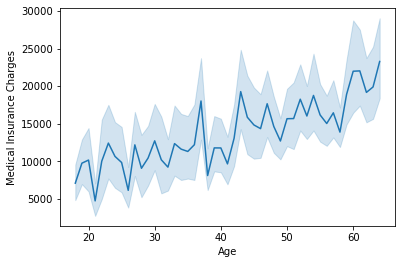

In [96]:
sns.lineplot(data=df,x='Age',y='Medical Insurance Charges')

There is a clear increase in medical insurance charges are individuals age

Use `.boxplot` to show the distribution of medical costs over the quadrants

<AxesSubplot:xlabel='Place of Residence', ylabel='Medical Insurance Charges'>

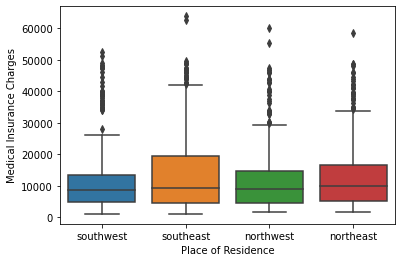

In [108]:
sns.boxplot(data=df,x='Place of Residence',y='Medical Insurance Charges')

Use `.groupby` to calculate the mean medical insurance charge based on sex

In [109]:
round(df.groupby('Place of Residence')['Medical Insurance Charges'].mean(),2)

Place of Residence
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: Medical Insurance Charges, dtype: float64

Individuals who live southeast are charged more for medical insurance on average